In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/anemia_adultos.csv")

**Diccionario de Datos:**

1. **Género:** Indica el género de la persona (por ejemplo, masculino o femenino). Importante para algunos análisis médicos debido a las diferencias normales en los valores de laboratorio entre hombres y mujeres.

2. **Hemoglobina:** Proteína en los glóbulos rojos que transporta oxígeno por todo el cuerpo. Niveles importantes para evaluar la capacidad de la sangre para transportar oxígeno.

3. **MCH (Media de Hemoglobina Corpuscular):** Cantidad promedio de hemoglobina en cada glóbulo rojo. Calculado dividiendo la hemoglobina total por el número total de glóbulos rojos.

4. **MCHC (Concentración Media de Hemoglobina Corpuscular):** Concentración promedio de hemoglobina en un volumen dado de glóbulos rojos. Calculado dividiendo la hemoglobina total por el volumen total de glóbulos rojos.

5. **MCV (Volumen Medio de Hematíes):** Tamaño promedio de los glóbulos rojos. Calculado dividiendo el volumen total de la sangre por el número total de glóbulos rojos.

6. **Resultado:** Posible resultado del análisis, indicando si los valores están dentro de los rangos normales o si hay alguna anormalidad que requiera atención médica.


In [5]:
#DataFrame para entender la estructura de los datos
print("DataFrame:")
print(df)

DataFrame:
       GENDER    HGB    MCH   MCHC     MCV  Result
0           1  12.21  33.48  33.63   99.55       1
1           1  12.70  26.50  32.60   81.30       1
2           0  13.84  29.04  33.21   87.44       0
3           0  12.49  30.81  29.97  102.80       0
4           1  16.40  28.30  34.70   81.50       0
...       ...    ...    ...    ...     ...     ...
15295       0  13.91  27.05  33.26   81.34       0
15296       1  14.60  28.70  34.10   84.10       0
15297       1  15.73  25.99  31.46   82.60       0
15298       0  11.66  27.40  32.99   83.07       1
15299       1   9.88  24.94  31.34   79.58       1

[15300 rows x 6 columns]


In [6]:
# Verifica si hay valores nulos en el DataFrame
print("\nValores nulos antes de la limpieza:")
print(df.isnull().sum())


Valores nulos antes de la limpieza:
GENDER    0
HGB       0
MCH       0
MCHC      0
MCV       0
Result    0
dtype: int64


In [7]:
# Limpia los valores nulos (en este caso, rellena los valores nulos con 0)
df.fillna(0, inplace=True)

In [8]:

# Muestra las primeras filas después de la limpieza
print("\nPrimeras filas del DataFrame después de la limpieza:")
print(df.head())



Primeras filas del DataFrame después de la limpieza:
   GENDER    HGB    MCH   MCHC     MCV  Result
0       1  12.21  33.48  33.63   99.55       1
1       1  12.70  26.50  32.60   81.30       1
2       0  13.84  29.04  33.21   87.44       0
3       0  12.49  30.81  29.97  102.80       0
4       1  16.40  28.30  34.70   81.50       0


In [9]:
# Verifica si hay valores nulos después de la limpieza
print("\nValores nulos después de la limpieza:")
print(df.isnull().sum())


Valores nulos después de la limpieza:
GENDER    0
HGB       0
MCH       0
MCHC      0
MCV       0
Result    0
dtype: int64


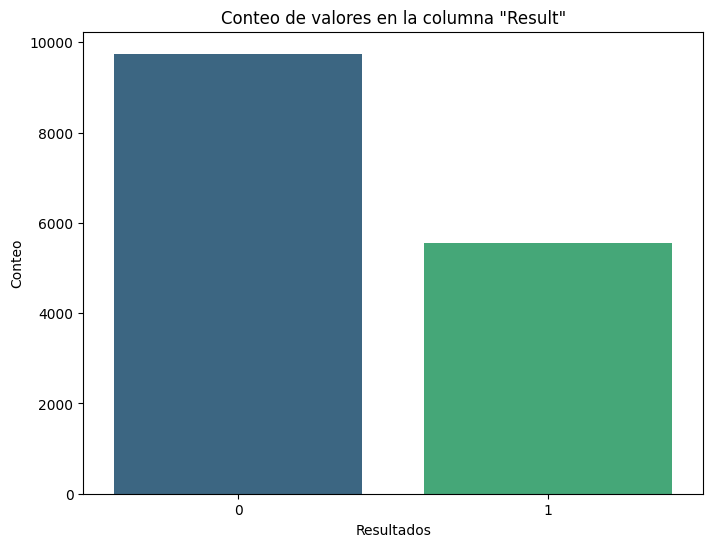

Conteo de valores en la columna 'Result':
0    9747
1    5553
Name: Result, dtype: int64


In [10]:
# Contar la cantidad de 0 y 1 en la columna "Result"
result_counts = df['Result'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='Result', data=df, palette='viridis')

# Agregar etiquetas y título al gráfico
plt.xlabel('Resultados')
plt.ylabel('Conteo')
plt.title('Conteo de valores en la columna "Result"')

# Mostrar el gráfico
plt.show()
# Mostrar los resultados
print("Conteo de valores en la columna 'Result':")
print(result_counts)


In [12]:
X = df.drop('Result', axis=1)
y = df['Result']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir pesos de clase para manejar el desequilibrio (en este caso, son iguales)
class_weights = {0: 1, 1: 1}


Modelo: Regresión Logística
Matriz de Confusión:
[[1947    0]
 [   7 1106]]
Recall: 0.9937
Precisión del modelo: 0.9977124183006536


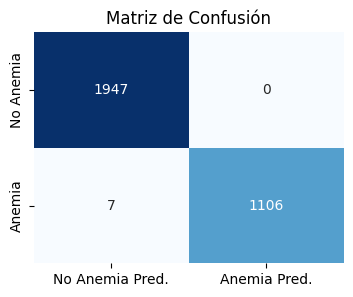

In [15]:
# Inicializar el modelo de Regresión Logística
regLogistic = LogisticRegression(class_weight=class_weights)

# Entrenar el modelo de Regresión Logística con los datos de entrenamiento
regLogistic.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = regLogistic.predict(X_test)

# Calcular la matriz de confusión para evaluar el rendimiento del modelo
cm = confusion_matrix(y_test, y_pred)

# Calcular el recall como una métrica adicional de rendimiento
recall = recall_score(y_test, y_pred)
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
# Imprimir resultados del modelo de Regresión Logística
print(f"\nModelo: Regresión Logística")
print(f"Matriz de Confusión:\n{cm}")
print(f"Recall: {recall:.4f}")
print("Precisión del modelo:", accuracy)

# Mostrar la matriz de confusión con colores utilizando seaborn y matplotlib
df_cm = pd.DataFrame(cm, index=['No Anemia', 'Anemia'], columns=['No Anemia Pred.', 'Anemia Pred.'])
plt.figure(figsize=(4, 3))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.show()


Modelo: SVC
Matriz de Confusión:
[[1920   27]
 [ 148  965]]
Recall: 0.8670
Precisión del modelo: 0.9428104575163399


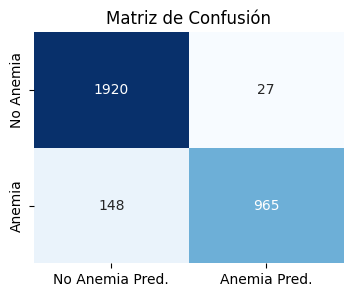

In [17]:
modelsvm = SVC(class_weight=class_weights)

# Entrenar el modelo SVM con los datos de entrenamiento
modelsvm.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelsvm.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred)
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
# Imprimir resultados del modelo SVM
print("\nModelo: SVC")
print(f"Matriz de Confusión:\n{cm}")
print(f"Recall: {recall:.4f}")
print("Precisión del modelo:", accuracy)

# Mostrar la matriz de confusión con colores
df_cm = pd.DataFrame(cm, index=['No Anemia', 'Anemia'], columns=['No Anemia Pred.', 'Anemia Pred.'])
plt.figure(figsize=(4,3))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.show()


Modelo: Árboles de Decisión
Matriz de Confusión:
[[1947    0]
 [   1 1112]]
Recall: 0.9991
Precisión del modelo: 0.9996732026143791


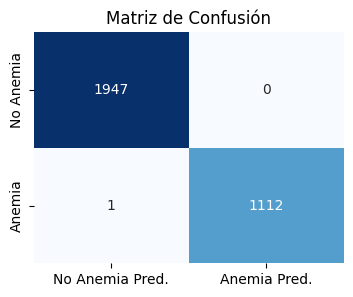

In [18]:
decisionTree = DecisionTreeClassifier(class_weight=class_weights)
# Entrenar el modelo
decisionTree.fit(X_train, y_train)
# Hacer predicciones en el conjunto de prueba
y_pred = decisionTree.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred)
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
# Imprimir resultados
print(f"\nModelo: Árboles de Decisión")
print(f"Matriz de Confusión:\n{cm}")
print(f"Recall: {recall:.4f}")
print("Precisión del modelo:", accuracy)


# Mostrar la matriz de confusión con colores
df_cm = pd.DataFrame(cm, index=['No Anemia', 'Anemia'], columns=['No Anemia Pred.', 'Anemia Pred.'])
plt.figure(figsize=(4, 3))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.show()


Modelo: Random Forest
Matriz de Confusión:
[[1947    0]
 [   1 1112]]
Recall: 0.9991
Precisión del modelo: 0.9996732026143791


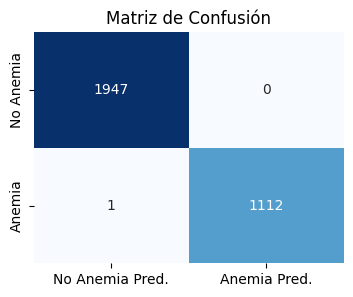

In [19]:
# Inicializar el modelo RandomForestClassifier
X_train.columns = ['GENDER','HGB', 'MCH', 'MCHC', 'MCV']
randomForest = RandomForestClassifier(class_weight=class_weights)

# Entrenar el modelo
randomForest.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = randomForest.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred)
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
# Imprimir resultados
print(f"\nModelo: Random Forest")
print(f"Matriz de Confusión:\n{cm}")
print(f"Recall: {recall:.4f}")
print("Precisión del modelo:", accuracy)

# Mostrar la matriz de confusión con colores
df_cm = pd.DataFrame(cm, index=['No Anemia', 'Anemia'], columns=['No Anemia Pred.', 'Anemia Pred.'])
plt.figure(figsize=(4,3))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:08:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)



Modelo: XGBoost
Matriz de Confusión:
[[1947    0]
 [   1 1112]]
Recall: 0.9991
Precisión del modelo: 0.9996732026143791


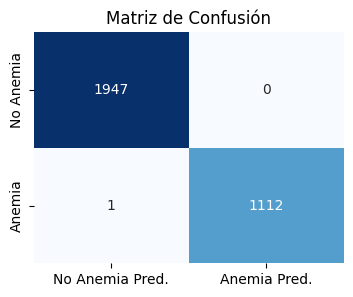

In [20]:
import xgboost as xgb

# Inicializar el modelo XGBoost
xgbModel = xgb.XGBClassifier(class_weight=class_weights)

# Entrenar el modelo
xgbModel.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = xgbModel.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred)
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
# Imprimir resultados
print(f"\nModelo: XGBoost")
print(f"Matriz de Confusión:\n{cm}")
print(f"Recall: {recall:.4f}")
print("Precisión del modelo:", accuracy)

# Mostrar la matriz de confusión con colores
df_cm = pd.DataFrame(cm, index=['No Anemia', 'Anemia'], columns=['No Anemia Pred.', 'Anemia Pred.'])
plt.figure(figsize=(4,3))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.show()



Modelo: Naive Bayes
Matriz de Confusión:
[[1834  113]
 [ 298  815]]
Recall: 0.7323
Precisión del modelo: 0.865686274509804


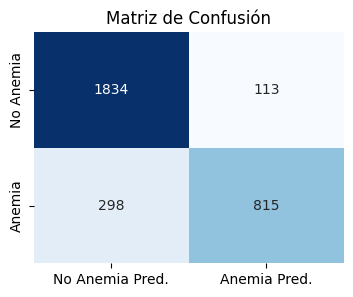

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, recall_score

# Inicializar el modelo Naive Bayes
naiveBayes = GaussianNB()

# Entrenar el modelo
naiveBayes.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = naiveBayes.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred)
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
# Imprimir resultados
print(f"\nModelo: Naive Bayes")
print(f"Matriz de Confusión:\n{cm}")
print(f"Recall: {recall:.4f}")
print("Precisión del modelo:", accuracy)
# Mostrar la matriz de confusión con colores
df_cm = pd.DataFrame(cm, index=['No Anemia', 'Anemia'], columns=['No Anemia Pred.', 'Anemia Pred.'])
plt.figure(figsize=(4,3))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.show()



Modelo: AdaBoost
Matriz de Confusión:
[[1947    0]
 [   1 1112]]
Recall: 0.9991
Precisión del modelo: 0.9996732026143791


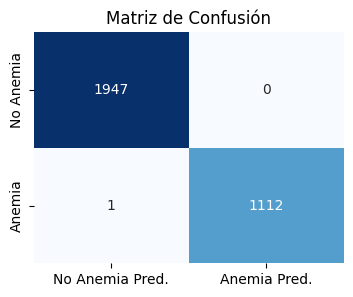

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, recall_score

# Inicializar el modelo AdaBoost
adaboostModel = AdaBoostClassifier()

# Entrenar el modelo
adaboostModel.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = adaboostModel.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred)
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
# Imprimir resultados
print(f"\nModelo: AdaBoost")
print(f"Matriz de Confusión:\n{cm}")
print(f"Recall: {recall:.4f}")
print("Precisión del modelo:", accuracy)
# Mostrar la matriz de confusión con colores
df_cm = pd.DataFrame(cm, index=['No Anemia', 'Anemia'], columns=['No Anemia Pred.', 'Anemia Pred.'])
plt.figure(figsize=(4,3))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.show()


In [35]:
import numpy as np

datos_persona_anemia = np.array([[1,12.8,33.48,33.63,99.55], [0,13.5,26.5,32.6,81.3],
                       [1,13.84,29.04,33.21,87.44],[1,14.6,30.7,33.1,92.9],[0,13.28,31.31,36.87,84.92]])

# Definir una lista de modelos con sus nombres
models = [['Random Forest', randomForest],
         ['Árboles de Decisión', decisionTree],['SVM',modelsvm],['Regresión Logística',regLogistic],
         ['XGBoost', xgbModel],['Naive Bayes', naiveBayes],['AdaBoost', adaboostModel]]
# Probar cada modelo con los datos de la persona
for name, model in models:
    # Hacer predicciones
    predicciones_persona_anemia = model.predict(datos_persona_anemia)

    # Imprimir resultados
    print(f"\nModelo: {name}")
    print(f"Predicción para la persona con posible anemia: {predicciones_persona_anemia}")


Modelo: Random Forest
Predicción para la persona con posible anemia: [1 0 0 0 0]

Modelo: Árboles de Decisión
Predicción para la persona con posible anemia: [1 0 0 0 0]

Modelo: SVM
Predicción para la persona con posible anemia: [0 0 0 0 0]

Modelo: Regresión Logística
Predicción para la persona con posible anemia: [1 0 0 0 0]

Modelo: XGBoost
Predicción para la persona con posible anemia: [1 0 0 0 0]

Modelo: Naive Bayes
Predicción para la persona con posible anemia: [0 0 0 0 0]

Modelo: AdaBoost
Predicción para la persona con posible anemia: [1 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,

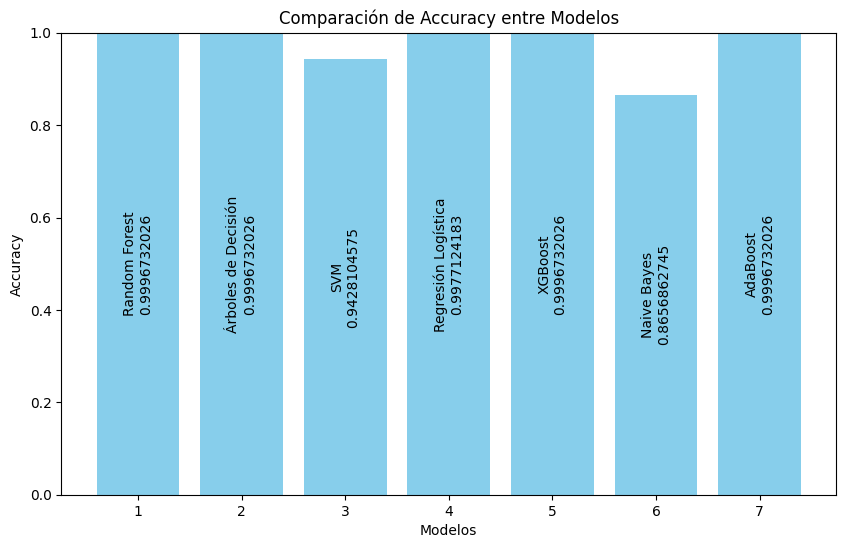

In [32]:

import matplotlib.pyplot as plt
# Recopilar los resultados de recall para cada modelo
model_names = ['Random Forest', 'Árboles de Decisión', 'SVM', 'Regresión Logística',
               'XGBoost', 'Naive Bayes', 'AdaBoost','RedesNeuronales']
numerosModelos = [1,2,3,4,5,6,7]
accuracys = [accuracy_score(y_test, randomForest.predict(X_test)),
           accuracy_score(y_test, decisionTree.predict(X_test)),
           accuracy_score(y_test, modelsvm.predict(X_test)),
           accuracy_score(y_test, regLogistic.predict(X_test)),
           accuracy_score(y_test, xgbModel.predict(X_test)),
           accuracy_score(y_test, naiveBayes.predict(X_test)),
           accuracy_score(y_test, adaboostModel.predict(X_test))]
# Crear un gráfico de barras para comparar los recalls
plt.figure(figsize=(10, 6))
bars = plt.bar(numerosModelos, accuracys, color='skyblue')
plt.title('Comparación de Accuracy entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ajustar el rango del eje y de 0 a 1
# Agregar etiquetas con los valores numéricos orientados verticalmente
for i, (bar, accuracy, model_name) in enumerate(zip(bars, accuracys, model_names)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{model_name}\n{accuracy:.10f}',
    ha='center', va='center', color='black', rotation='vertical')
plt.show()